## Non Hermitian Operation, e.g. Nitrogen T2 time

In real life when working with NV centers we have relaxation and decoherence coming in a play. In the following,
we want to study decoherence of the nitrogen nuclear spin ($T_2$) due to the $T_1$-relaxation of the electron spin. For this we use the library, which applies operators (here $S^-$ and $S^+$) based on random number generators.\
\
Further we can see how dressing fields ($S_x$) in the spin triplet can prolong the nuclear lifetime beyond the electron $T_1$ time, see also (https://dspace.mit.edu/bitstream/handle/1721.1/124223/Chen_2018_New_J._Phys._20_063011.pdf?sequence=2&isAllowed=y)

qutip documentation: http://qutip.org/docs/3.1.0/guide/dynamics/dynamics-master.html#unitary-evolution

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as q 

In [3]:
sp = q.spin_Jm(1)
sm = q.spin_Jp(1)

In [12]:
times = np.linspace(0.0, 20.0, 200)
psi0 = q.tensor(q.fock(3,1), (q.fock(2, 0) + q.fock(2, 1))/np.sqrt(2) )
#5 photons, 1 atom
print(psi0)
Omega = 1
Omega *= 2 * np.pi

# NV hamiltonian
sx = q.spin_Jx(1)
sy = q.spin_Jy(1)
sz = q.spin_Jz(1)
sp = q.spin_Jp(1)
sm = q.spin_Jm(1)

ix = q.spin_Jx(0.5)
iy = q.spin_Jy(0.5)
iz = q.spin_Jz(0.5)



Sx = q.tensor(sx, q.qeye(2))
Sy = q.tensor(sy, q.qeye(2))
Sz = q.tensor(sz, q.qeye(2))

Ix = q.tensor(q.qeye(3), ix)
Iy = q.tensor(q.qeye(3), iy)
Iz = q.tensor(q.qeye(3), iz)


xx1 = q.tensor(sp, q.qeye(2))
xx2 = q.tensor(sm, q.qeye(2))

decay_array = []
prob = 0.1
decay_array.append(np.sqrt(prob) * xx1)
decay_array.append(np.sqrt(prob) * xx2)

#inhomogenious driving
Omega = 6 #MHz
Azz = 3 #MHz
wi = 0.5 #MHz

datas = []
for k in range(2):
    H =  Azz * 2 * np.pi * Sz * Iz + wi * 2 * np.pi * Iz + k * Omega * 2 * np.pi * Sx

    #data = q.mcsolve(H, psi0, times, decay_array, [Ix, Sx])
    data = q.mesolve(H, psi0, times, decay_array, [Ix, Sx])
    datas.append(data)

Quantum object: dims = [[3, 2], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]


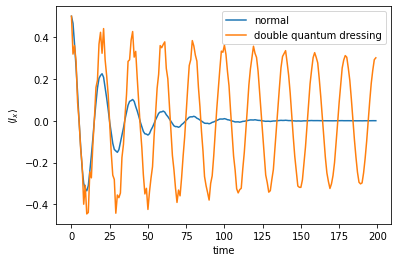

In [13]:
labels = ['normal','double quantum dressing']
for k,dat in enumerate(datas):
    plt.plot(dat.expect[0],label=labels[k])
plt.legend()
plt.ylabel('$\\langle I_x \\rangle$')
plt.xlabel('time')
plt.show()
    